In [7]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sqlalchemy import create_engine

In [8]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
    
query1='''
SELECT
    *
FROM
    heartdisease
'''
    
    
df = pd.read_sql_query(query1, con=engine)
engine.dispose()

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 0, 1)
    
# Scale the dataframe
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Apply DBSCAN to the heart disease dataset by trying different values for the eps and min_samples parameters. You'll realize that it's really hard—if not impossible—to get a two-cluster solution using DBSCAN.

In [11]:
# Defining the algorithm
dbscan_cluster = DBSCAN(eps=4, min_samples=100)

# Fit model
clusters = dbscan_cluster.fit_predict(X)

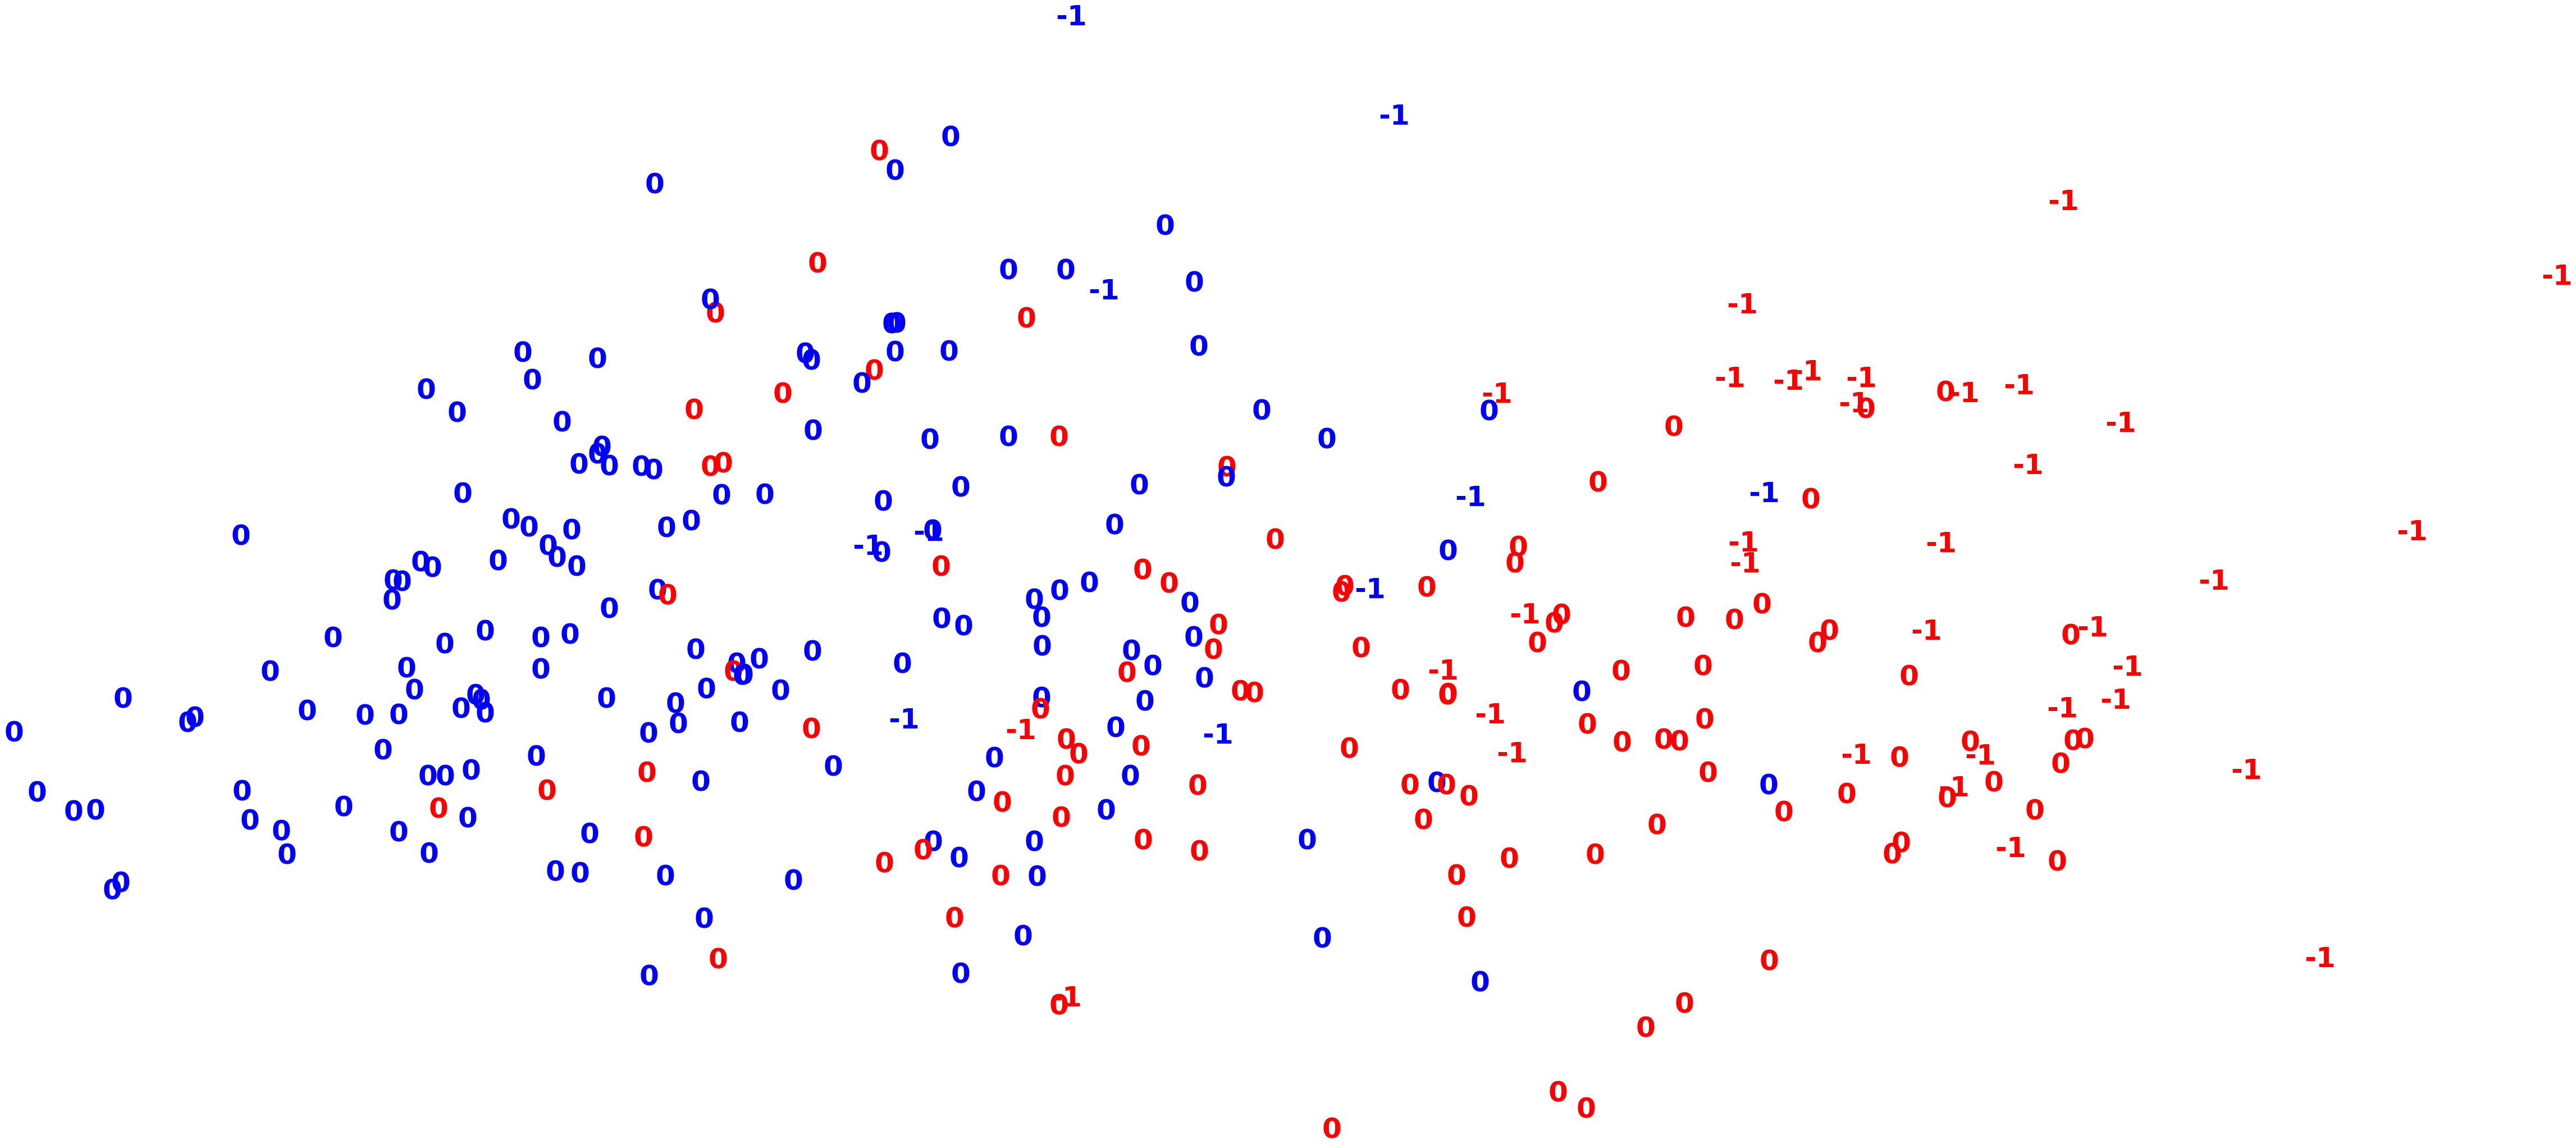

In [12]:
pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

I tried many combinations and was only ever able to get all noise points or one cluster. 

### Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then increase the value of min_samples. When you increase the value of min_samples, how does that affect the number of clusters that DBSCAN identifies?

In [29]:
samples = np.arange(1,25)
out = []

for sample in samples:
    # Defining the algorithm
    dbscan_cluster = DBSCAN(eps=1, min_samples=sample, metric='euclidean')

    # Fit model
    pred = dbscan_cluster.fit_predict(X)


    #clusters = pred

    #print(f'For {sample} samples:', '\n', '-'*20)
    #print(f'Silhouette Score: {sil}', '\n')
    #print(f'Adjusted Rand Index Score: {ari}', '\n')
    


    clusters = len(np.unique(pred))
    out.append([f'{sample}', f'{clusters}'])

                
                
# input the results into a DataFrame                
out = pd.DataFrame(out, columns = [['Number of Samples', 'Number of Clusters']])

# return the results                
out

,Number of Samples,Number of Clusters
0,1,294
1,2,9
2,3,2
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


### Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then increase the value of eps. When you increase the value of eps, how does that affect the number of clusters that DBSCAN identifies?

In [33]:
eps = np.arange(1,25)
out = []

for eps in np.arange(1,25):
    # Defining the algorithm
    dbscan_cluster = DBSCAN(eps=eps, min_samples=1, metric='euclidean')

    # Fit model
    pred = dbscan_cluster.fit_predict(X)


    #clusters = pred

    #print(f'For {sample} samples:', '\n', '-'*20)
    #print(f'Silhouette Score: {sil}', '\n')
    #print(f'Adjusted Rand Index Score: {ari}', '\n')
    


    clusters = len(np.unique(pred))
    out.append([f'{sample}', f'{clusters}'])

                
                
# input the results into a DataFrame                
out = pd.DataFrame(out, columns = [['Number of Samples', 'Number of Clusters']])

# return the results                
out

,Number of Samples,Number of Clusters
0,1,294
1,1,178
2,1,34
3,1,3
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1
